IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WELFake_Dataset.csv.zip')

In [ ]:
dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
dataset.shape

(72134, 4)

In [ ]:
#checking for empty values
dataset.isna().sum()


Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
dataset.dropna(axis=0,inplace=True)

In [ ]:
#rewriting the index
dataset.reset_index(inplace=True)

<Axes: ylabel='count'>

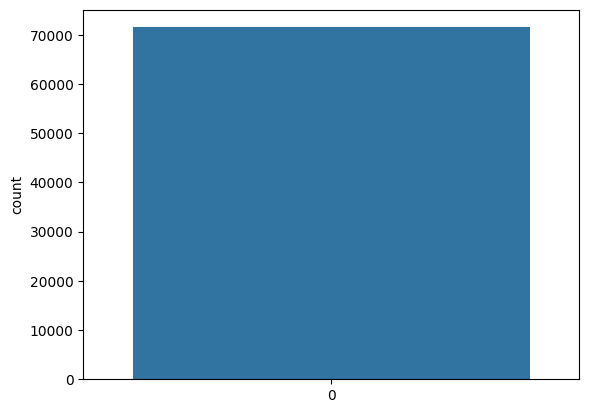

In [ ]:
#balanced or imbalanced data
sns.countplot(dataset['label'])

In [ ]:
#pre-processing the data
data=dataset['title'][0]
data

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [ ]:
#regular expression
import re
data=re.sub('[^a-zA-Z]','',data)
data

'LAWENFORCEMENTONHIGHALERTFollowingThreatsAgainstCopsAndWhitesOnByBlackLivesMatterAndFYFTerroristsVIDEO'

In [ ]:
#changing to lower case
data=data.lower()
data

'lawenforcementonhighalertfollowingthreatsagainstcopsandwhitesonbyblacklivesmatterandfyfterroristsvideo'

In [ ]:
#splitting the test
list=data.split()
list

['lawenforcementonhighalertfollowingthreatsagainstcopsandwhitesonbyblacklivesmatterandfyfterroristsvideo']

In [ ]:
#removing the stopwords from the text if any
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
''.join(review)


'lawenforcementonhighalertfollowingthreatsagainstcopsandwhitesonbyblacklivesmatterandfyfterroristsvideo'

In [ ]:
corpus=[]
for i in range(0,len(dataset)):
  review=re.sub('[^a-zA-Z]','',dataset['title'][i])
  review=review.lower()
  list=review.split()
  review=[ps.stem(word) for word in list if not word in set(stopwords.words('english'))]
  corpus.append(''.join(review))


In [ ]:
corpus[0]
corpus

['lawenforcementonhighalertfollowingthreatsagainstcopsandwhitesonbyblacklivesmatterandfyfterroristsvideo',
 'unbelievableobamasattorneygeneralsaysmostcharlotterioterswerepeacefulprotestersinherhomestateofnorthcarolinavideo',
 'bobbyjindalraisedhinduusesstoryofchristianconversiontowooevangelicalsforpotentialbid',
 'satanrussiaunvelisanimageofitsterrifyingnewsupernukewesternworldtakesnotic',
 'abouttimechristiangroupsuesamazonandsplcfordesignationashategroup',
 'drbencarsontargetedbytheirsineverhadanaudituntilispokeatthenationalprayerbreakfast',
 'houseintelchairontrumprussiafakestorynoevidenceofanythingvideo',
 'sportsbarownerbansnflgameswillshowonlytrueamericansportsidliketospeakforruralamericavideo',
 'latestpipelineleakunderscoresdangersofdakotaaccesspipelin',
 'gopsenatorjustsmackeddownthemostpunchablealtrightnaziontheinternet',
 'maybrexitofferwouldhurtcosteucitizenseuparlia',
 'schumercallsontrumptoappointofficialtooverseepuertoricorelief',
 'watchhilariousadcallsintoquestionhealt

In [ ]:
#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
x.shape
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y=dataset['label']
y

0        1
1        1
2        0
3        1
4        1
        ..
71532    0
71533    1
71534    0
71535    0
71536    1
Name: label, Length: 71537, dtype: int64

In [ ]:
x.shape
y.shape

(71537,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)



In [ ]:
from sklearn.metrics import confusion_metrics,accuracy_score
cm=confusion_metrics(y_test,y_pred)
sns.heatmap(m,annot=True)
cm
accuracy_score(y_test,y_pred)